In [9]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from PIL import Image

In [10]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [11]:
from src.visualization import plot_acc_loss
from src.data import make_dataset_50x50x2, dataset_train, dataset_val

In [12]:
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Activation, Flatten
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

# SIMPLE CNN

this convolution neural network is based on CNN lenet-5 with changes in the number of filters and other things

In [32]:
process_train = '../data/processed/train/'
process_test = '../data/processed/test/'
process_val = '../data/processed/val/'

test_data = '../data/raw/test/'

category_names = ['messy/', 'clean/']

In [14]:
# Generate dataset 50x50x2

make_dataset_50x50x2()

In [15]:
x_train, y_train = dataset_train()
x_val, y_val = dataset_val()

print('train x = ', x_train.shape)
print('train y = ', y_train.shape)
print('val x = ', x_val.shape)
print('val y = ', y_val.shape)

train x =  (192, 50, 50, 2)
train y =  (192,)
val x =  (20, 50, 50, 2)
val y =  (20,)


# Model CNN

In [16]:
def build_classifier():
    model = Sequential()

    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(x_train.shape[1:]) ) )
    model.add(MaxPool2D(2,2))
    
    model.add(Conv2D(16, (3,3) , activation='relu'))
    model.add(MaxPool2D(2,2))
    
    model.add(Flatten())
    model.add(Dense(1 , activation="sigmoid"))
    
    return model

In [17]:
model_1 = build_classifier()

In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        608       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1936)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1937      
Total params: 7,169
Trainable params: 7,169
Non-trainable params: 0
______________________________________________________

In [19]:
model_1.compile( optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'] )

# FIT first model

In [20]:
history = model_1.fit(x_train, y_train, batch_size = 20, epochs =100, validation_data = (x_val, y_val) )

Epoch 1/100
10/10 [==============================] - 1s 49ms/step - loss: 0.6890 - accuracy: 0.5044 - val_loss: 0.6818 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - 0s 33ms/step - loss: 0.6893 - accuracy: 0.5315 - val_loss: 0.6536 - val_accuracy: 0.6500
Epoch 3/100
10/10 [==============================] - 0s 31ms/step - loss: 0.6429 - accuracy: 0.7087 - val_loss: 0.6300 - val_accuracy: 0.6500
Epoch 4/100
10/10 [==============================] - 0s 30ms/step - loss: 0.6222 - accuracy: 0.6257 - val_loss: 0.5866 - val_accuracy: 0.7500
Epoch 5/100
10/10 [==============================] - 0s 34ms/step - loss: 0.5684 - accuracy: 0.7598 - val_loss: 0.6011 - val_accuracy: 0.6500
Epoch 6/100
10/10 [==============================] - 0s 43ms/step - loss: 0.5561 - accuracy: 0.7039 - val_loss: 0.5547 - val_accuracy: 0.7500
Epoch 7/100
10/10 [==============================] - 1s 56ms/step - loss: 0.5862 - accuracy: 0.6838 - val_loss: 0.5920 - val_accuracy: 0.6500
Epoch 

10/10 [==============================] - 0s 33ms/step - loss: 0.1616 - accuracy: 0.9478 - val_loss: 0.8752 - val_accuracy: 0.7000
Epoch 59/100
10/10 [==============================] - 0s 33ms/step - loss: 0.1663 - accuracy: 0.9264 - val_loss: 0.9107 - val_accuracy: 0.6500
Epoch 60/100
10/10 [==============================] - 0s 35ms/step - loss: 0.1315 - accuracy: 0.9730 - val_loss: 0.9764 - val_accuracy: 0.6500
Epoch 61/100
10/10 [==============================] - 0s 33ms/step - loss: 0.1621 - accuracy: 0.9468 - val_loss: 0.9769 - val_accuracy: 0.6500
Epoch 62/100
10/10 [==============================] - 0s 34ms/step - loss: 0.1534 - accuracy: 0.9494 - val_loss: 0.9489 - val_accuracy: 0.7000
Epoch 63/100
10/10 [==============================] - 0s 34ms/step - loss: 0.2064 - accuracy: 0.9191 - val_loss: 1.0478 - val_accuracy: 0.8000
Epoch 64/100
10/10 [==============================] - 0s 35ms/step - loss: 0.1943 - accuracy: 0.9049 - val_loss: 0.9831 - val_accuracy: 0.6500
Epoch 65/100

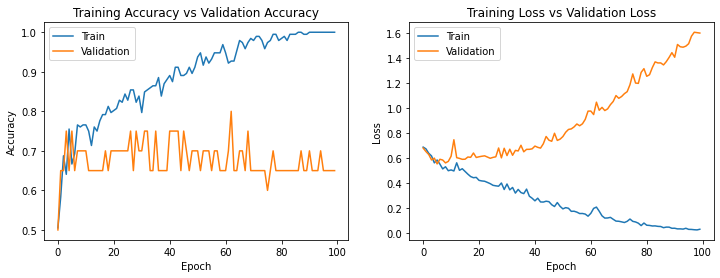

In [21]:
plot_acc_loss(history)

     Result : Over-fitting

In [22]:
model_2 = build_classifier()

     Change the learning rate, to learning more slow on adam optimizer

In [23]:
opt = Adam(learning_rate = 0.00001)

model_2.compile( optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy'] )

# FIT second model with new learning rate

In [24]:
history = model_2.fit(x_train, y_train, batch_size = 10, epochs =100, validation_data = (x_val, y_val) )

Epoch 1/100
20/20 [==============================] - 1s 26ms/step - loss: 0.7191 - accuracy: 0.4808 - val_loss: 0.7094 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 0s 17ms/step - loss: 0.7138 - accuracy: 0.4792 - val_loss: 0.7052 - val_accuracy: 0.5000
Epoch 3/100
20/20 [==============================] - 0s 18ms/step - loss: 0.7089 - accuracy: 0.4760 - val_loss: 0.7011 - val_accuracy: 0.5000
Epoch 4/100
20/20 [==============================] - 0s 19ms/step - loss: 0.7059 - accuracy: 0.4686 - val_loss: 0.6983 - val_accuracy: 0.5000
Epoch 5/100
20/20 [==============================] - 0s 23ms/step - loss: 0.6872 - accuracy: 0.5302 - val_loss: 0.6962 - val_accuracy: 0.5000
Epoch 6/100
20/20 [==============================] - 0s 24ms/step - loss: 0.6960 - accuracy: 0.4815 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 7/100
20/20 [==============================] - 0s 22ms/step - loss: 0.7006 - accuracy: 0.4524 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 

20/20 [==============================] - 0s 19ms/step - loss: 0.6404 - accuracy: 0.7403 - val_loss: 0.6493 - val_accuracy: 0.7000
Epoch 59/100
20/20 [==============================] - 0s 18ms/step - loss: 0.6367 - accuracy: 0.7178 - val_loss: 0.6484 - val_accuracy: 0.7000
Epoch 60/100
20/20 [==============================] - 0s 19ms/step - loss: 0.6390 - accuracy: 0.7378 - val_loss: 0.6476 - val_accuracy: 0.7000
Epoch 61/100
20/20 [==============================] - 0s 19ms/step - loss: 0.6338 - accuracy: 0.7379 - val_loss: 0.6469 - val_accuracy: 0.7000
Epoch 62/100
20/20 [==============================] - 0s 18ms/step - loss: 0.6365 - accuracy: 0.7723 - val_loss: 0.6460 - val_accuracy: 0.7000
Epoch 63/100
20/20 [==============================] - 0s 18ms/step - loss: 0.6298 - accuracy: 0.7653 - val_loss: 0.6452 - val_accuracy: 0.7000
Epoch 64/100
20/20 [==============================] - 0s 18ms/step - loss: 0.6351 - accuracy: 0.7058 - val_loss: 0.6445 - val_accuracy: 0.6500
Epoch 65/100

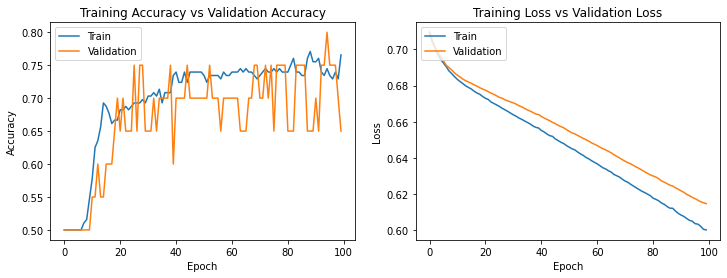

In [25]:
plot_acc_loss(history)

    Next Step : update epochs to 2000

In [26]:
model_3 = build_classifier()
opt = Adam(learning_rate = 0.00001)
model_3.compile( optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy'] )

# FIT third model with new epochs (100 -> 2000)

In [27]:
history = model_3.fit(x_train, y_train, batch_size = 10, epochs = 2000, validation_data = (x_val, y_val) )

Epoch 1/2000
20/20 [==============================] - 1s 26ms/step - loss: 0.6928 - accuracy: 0.5071 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch 2/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.6939 - accuracy: 0.4882 - val_loss: 0.6887 - val_accuracy: 0.5000
Epoch 3/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.6868 - accuracy: 0.5190 - val_loss: 0.6879 - val_accuracy: 0.5000
Epoch 4/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.6888 - accuracy: 0.5075 - val_loss: 0.6871 - val_accuracy: 0.5000
Epoch 5/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.6888 - accuracy: 0.5022 - val_loss: 0.6863 - val_accuracy: 0.5000
Epoch 6/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.6821 - accuracy: 0.5277 - val_loss: 0.6857 - val_accuracy: 0.5000
Epoch 7/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.6868 - accuracy: 0.5000 - val_loss: 0.6848 - val_accuracy: 0.5000

Epoch 58/2000
20/20 [==============================] - 0s 22ms/step - loss: 0.6404 - accuracy: 0.7411 - val_loss: 0.6525 - val_accuracy: 0.7500
Epoch 59/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.6484 - accuracy: 0.6933 - val_loss: 0.6516 - val_accuracy: 0.7500
Epoch 60/2000
20/20 [==============================] - 0s 22ms/step - loss: 0.6453 - accuracy: 0.7226 - val_loss: 0.6508 - val_accuracy: 0.7500
Epoch 61/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.6427 - accuracy: 0.7255 - val_loss: 0.6500 - val_accuracy: 0.7500
Epoch 62/2000
20/20 [==============================] - 0s 23ms/step - loss: 0.6535 - accuracy: 0.7056 - val_loss: 0.6492 - val_accuracy: 0.7000
Epoch 63/2000
20/20 [==============================] - 0s 22ms/step - loss: 0.6496 - accuracy: 0.7024 - val_loss: 0.6483 - val_accuracy: 0.7500
Epoch 64/2000
20/20 [==============================] - 0s 23ms/step - loss: 0.6517 - accuracy: 0.7067 - val_loss: 0.6475 - val_accuracy:

Epoch 115/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.5866 - accuracy: 0.7417 - val_loss: 0.6101 - val_accuracy: 0.7500
Epoch 116/2000
20/20 [==============================] - 0s 22ms/step - loss: 0.6036 - accuracy: 0.7129 - val_loss: 0.6095 - val_accuracy: 0.7500
Epoch 117/2000
20/20 [==============================] - 0s 23ms/step - loss: 0.6157 - accuracy: 0.6897 - val_loss: 0.6090 - val_accuracy: 0.7500
Epoch 118/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.5831 - accuracy: 0.7330 - val_loss: 0.6083 - val_accuracy: 0.7500
Epoch 119/2000
20/20 [==============================] - 0s 23ms/step - loss: 0.5941 - accuracy: 0.7249 - val_loss: 0.6076 - val_accuracy: 0.7500
Epoch 120/2000
20/20 [==============================] - 0s 23ms/step - loss: 0.6225 - accuracy: 0.6643 - val_loss: 0.6070 - val_accuracy: 0.7500
Epoch 121/2000
20/20 [==============================] - 0s 23ms/step - loss: 0.5908 - accuracy: 0.7399 - val_loss: 0.6063 - val_ac

20/20 [==============================] - 0s 20ms/step - loss: 0.5458 - accuracy: 0.7595 - val_loss: 0.5827 - val_accuracy: 0.7500
Epoch 172/2000
20/20 [==============================] - 0s 22ms/step - loss: 0.5635 - accuracy: 0.7468 - val_loss: 0.5824 - val_accuracy: 0.7500
Epoch 173/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.5547 - accuracy: 0.7328 - val_loss: 0.5821 - val_accuracy: 0.7500
Epoch 174/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.5897 - accuracy: 0.7044 - val_loss: 0.5818 - val_accuracy: 0.7500
Epoch 175/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.5617 - accuracy: 0.7387 - val_loss: 0.5815 - val_accuracy: 0.7500
Epoch 176/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.5473 - accuracy: 0.7856 - val_loss: 0.5811 - val_accuracy: 0.7500
Epoch 177/2000
20/20 [==============================] - 0s 23ms/step - loss: 0.5581 - accuracy: 0.7665 - val_loss: 0.5811 - val_accuracy: 0.7500


20/20 [==============================] - 0s 22ms/step - loss: 0.5243 - accuracy: 0.7672 - val_loss: 0.5671 - val_accuracy: 0.7000
Epoch 228/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.5508 - accuracy: 0.7633 - val_loss: 0.5668 - val_accuracy: 0.7500
Epoch 229/2000
20/20 [==============================] - 0s 22ms/step - loss: 0.5744 - accuracy: 0.7181 - val_loss: 0.5666 - val_accuracy: 0.7500
Epoch 230/2000
20/20 [==============================] - 0s 22ms/step - loss: 0.5807 - accuracy: 0.7205 - val_loss: 0.5664 - val_accuracy: 0.7500
Epoch 231/2000
20/20 [==============================] - 0s 22ms/step - loss: 0.5343 - accuracy: 0.7548 - val_loss: 0.5661 - val_accuracy: 0.7500
Epoch 232/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.5334 - accuracy: 0.7810 - val_loss: 0.5661 - val_accuracy: 0.7000
Epoch 233/2000
20/20 [==============================] - 0s 22ms/step - loss: 0.5291 - accuracy: 0.7840 - val_loss: 0.5659 - val_accuracy: 0.7000


20/20 [==============================] - 0s 23ms/step - loss: 0.5347 - accuracy: 0.7540 - val_loss: 0.5594 - val_accuracy: 0.7500
Epoch 284/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.5609 - accuracy: 0.7490 - val_loss: 0.5594 - val_accuracy: 0.7500
Epoch 285/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.5595 - accuracy: 0.7366 - val_loss: 0.5591 - val_accuracy: 0.7000
Epoch 286/2000
20/20 [==============================] - 0s 22ms/step - loss: 0.5441 - accuracy: 0.7715 - val_loss: 0.5590 - val_accuracy: 0.7500
Epoch 287/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.5633 - accuracy: 0.7377 - val_loss: 0.5589 - val_accuracy: 0.7000
Epoch 288/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.5293 - accuracy: 0.7760 - val_loss: 0.5586 - val_accuracy: 0.7000
Epoch 289/2000
20/20 [==============================] - 0s 22ms/step - loss: 0.5103 - accuracy: 0.7736 - val_loss: 0.5587 - val_accuracy: 0.7500


20/20 [==============================] - 0s 21ms/step - loss: 0.4863 - accuracy: 0.8124 - val_loss: 0.5542 - val_accuracy: 0.7000
Epoch 340/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.5364 - accuracy: 0.7442 - val_loss: 0.5544 - val_accuracy: 0.7500
Epoch 341/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.5128 - accuracy: 0.7808 - val_loss: 0.5542 - val_accuracy: 0.7500
Epoch 342/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.4993 - accuracy: 0.7826 - val_loss: 0.5541 - val_accuracy: 0.7500
Epoch 343/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.5029 - accuracy: 0.7789 - val_loss: 0.5540 - val_accuracy: 0.7500
Epoch 344/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.5177 - accuracy: 0.7701 - val_loss: 0.5535 - val_accuracy: 0.7000
Epoch 345/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.4951 - accuracy: 0.8082 - val_loss: 0.5539 - val_accuracy: 0.7500


20/20 [==============================] - 0s 19ms/step - loss: 0.5353 - accuracy: 0.7543 - val_loss: 0.5458 - val_accuracy: 0.7000
Epoch 396/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.5656 - accuracy: 0.7372 - val_loss: 0.5460 - val_accuracy: 0.7500
Epoch 397/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.5146 - accuracy: 0.7579 - val_loss: 0.5460 - val_accuracy: 0.7500
Epoch 398/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.5013 - accuracy: 0.8029 - val_loss: 0.5458 - val_accuracy: 0.7500
Epoch 399/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.4536 - accuracy: 0.8149 - val_loss: 0.5457 - val_accuracy: 0.7500
Epoch 400/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.5283 - accuracy: 0.7816 - val_loss: 0.5455 - val_accuracy: 0.7000
Epoch 401/2000
20/20 [==============================] - 0s 23ms/step - loss: 0.4875 - accuracy: 0.8106 - val_loss: 0.5456 - val_accuracy: 0.7500


20/20 [==============================] - 0s 19ms/step - loss: 0.5384 - accuracy: 0.7304 - val_loss: 0.5439 - val_accuracy: 0.7500
Epoch 452/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.4796 - accuracy: 0.8200 - val_loss: 0.5439 - val_accuracy: 0.7500
Epoch 453/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.4957 - accuracy: 0.7802 - val_loss: 0.5437 - val_accuracy: 0.7000
Epoch 454/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.4798 - accuracy: 0.8034 - val_loss: 0.5436 - val_accuracy: 0.7500
Epoch 455/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.4914 - accuracy: 0.7850 - val_loss: 0.5436 - val_accuracy: 0.7500
Epoch 456/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.4905 - accuracy: 0.8062 - val_loss: 0.5436 - val_accuracy: 0.7500
Epoch 457/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.4770 - accuracy: 0.8159 - val_loss: 0.5435 - val_accuracy: 0.7500


20/20 [==============================] - 0s 18ms/step - loss: 0.4949 - accuracy: 0.7686 - val_loss: 0.5422 - val_accuracy: 0.7500
Epoch 508/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.4578 - accuracy: 0.8127 - val_loss: 0.5421 - val_accuracy: 0.7500
Epoch 509/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.5078 - accuracy: 0.7780 - val_loss: 0.5420 - val_accuracy: 0.7500
Epoch 510/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.4745 - accuracy: 0.8038 - val_loss: 0.5422 - val_accuracy: 0.7500
Epoch 511/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.4947 - accuracy: 0.7561 - val_loss: 0.5421 - val_accuracy: 0.7500
Epoch 512/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.4705 - accuracy: 0.8048 - val_loss: 0.5420 - val_accuracy: 0.7500
Epoch 513/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.5112 - accuracy: 0.7588 - val_loss: 0.5421 - val_accuracy: 0.7500


20/20 [==============================] - 0s 19ms/step - loss: 0.4865 - accuracy: 0.7699 - val_loss: 0.5402 - val_accuracy: 0.7500
Epoch 564/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.4683 - accuracy: 0.7932 - val_loss: 0.5399 - val_accuracy: 0.7500
Epoch 565/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.4879 - accuracy: 0.7715 - val_loss: 0.5396 - val_accuracy: 0.8000
Epoch 566/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.5196 - accuracy: 0.7574 - val_loss: 0.5397 - val_accuracy: 0.8000
Epoch 567/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.5046 - accuracy: 0.7766 - val_loss: 0.5395 - val_accuracy: 0.8000
Epoch 568/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.4924 - accuracy: 0.7783 - val_loss: 0.5394 - val_accuracy: 0.7500
Epoch 569/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.4492 - accuracy: 0.8212 - val_loss: 0.5393 - val_accuracy: 0.8000


20/20 [==============================] - 0s 21ms/step - loss: 0.4778 - accuracy: 0.7952 - val_loss: 0.5369 - val_accuracy: 0.8000
Epoch 620/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.5167 - accuracy: 0.7614 - val_loss: 0.5369 - val_accuracy: 0.8000
Epoch 621/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.4568 - accuracy: 0.8093 - val_loss: 0.5368 - val_accuracy: 0.8000
Epoch 622/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.4852 - accuracy: 0.7828 - val_loss: 0.5368 - val_accuracy: 0.8000
Epoch 623/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.4657 - accuracy: 0.8186 - val_loss: 0.5368 - val_accuracy: 0.8000
Epoch 624/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.4571 - accuracy: 0.8024 - val_loss: 0.5368 - val_accuracy: 0.8000
Epoch 625/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.4686 - accuracy: 0.7827 - val_loss: 0.5367 - val_accuracy: 0.8000


20/20 [==============================] - 0s 20ms/step - loss: 0.4607 - accuracy: 0.8126 - val_loss: 0.5355 - val_accuracy: 0.8000
Epoch 676/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.4716 - accuracy: 0.8078 - val_loss: 0.5354 - val_accuracy: 0.8000
Epoch 677/2000
20/20 [==============================] - 0s 22ms/step - loss: 0.4652 - accuracy: 0.8119 - val_loss: 0.5354 - val_accuracy: 0.8000
Epoch 678/2000
20/20 [==============================] - 0s 23ms/step - loss: 0.4695 - accuracy: 0.7889 - val_loss: 0.5353 - val_accuracy: 0.8000
Epoch 679/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.4905 - accuracy: 0.7731 - val_loss: 0.5352 - val_accuracy: 0.8000
Epoch 680/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.4686 - accuracy: 0.7943 - val_loss: 0.5354 - val_accuracy: 0.8000
Epoch 681/2000
20/20 [==============================] - 0s 22ms/step - loss: 0.4881 - accuracy: 0.7942 - val_loss: 0.5354 - val_accuracy: 0.8000


20/20 [==============================] - 0s 21ms/step - loss: 0.4993 - accuracy: 0.7815 - val_loss: 0.5334 - val_accuracy: 0.8000
Epoch 732/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.5312 - accuracy: 0.7490 - val_loss: 0.5337 - val_accuracy: 0.8000
Epoch 733/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.4789 - accuracy: 0.7993 - val_loss: 0.5333 - val_accuracy: 0.8000
Epoch 734/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.4968 - accuracy: 0.7709 - val_loss: 0.5334 - val_accuracy: 0.8000
Epoch 735/2000
20/20 [==============================] - 0s 22ms/step - loss: 0.4120 - accuracy: 0.8417 - val_loss: 0.5333 - val_accuracy: 0.8000
Epoch 736/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.4387 - accuracy: 0.8254 - val_loss: 0.5333 - val_accuracy: 0.8000
Epoch 737/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.4649 - accuracy: 0.7904 - val_loss: 0.5332 - val_accuracy: 0.8000


20/20 [==============================] - 0s 21ms/step - loss: 0.4680 - accuracy: 0.8020 - val_loss: 0.5314 - val_accuracy: 0.8000
Epoch 788/2000
20/20 [==============================] - 0s 22ms/step - loss: 0.5205 - accuracy: 0.7681 - val_loss: 0.5314 - val_accuracy: 0.8000
Epoch 789/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.4144 - accuracy: 0.8780 - val_loss: 0.5313 - val_accuracy: 0.8000
Epoch 790/2000
20/20 [==============================] - 1s 26ms/step - loss: 0.4825 - accuracy: 0.7739 - val_loss: 0.5312 - val_accuracy: 0.8000
Epoch 791/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.4747 - accuracy: 0.8014 - val_loss: 0.5312 - val_accuracy: 0.8000
Epoch 792/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.4603 - accuracy: 0.8080 - val_loss: 0.5313 - val_accuracy: 0.8000
Epoch 793/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.4908 - accuracy: 0.7660 - val_loss: 0.5313 - val_accuracy: 0.8000


20/20 [==============================] - 0s 14ms/step - loss: 0.4330 - accuracy: 0.8329 - val_loss: 0.5291 - val_accuracy: 0.8000
Epoch 844/2000
20/20 [==============================] - 0s 15ms/step - loss: 0.4529 - accuracy: 0.8194 - val_loss: 0.5294 - val_accuracy: 0.8000
Epoch 845/2000
20/20 [==============================] - 0s 15ms/step - loss: 0.4849 - accuracy: 0.7845 - val_loss: 0.5291 - val_accuracy: 0.8000
Epoch 846/2000
20/20 [==============================] - 0s 15ms/step - loss: 0.4893 - accuracy: 0.7512 - val_loss: 0.5290 - val_accuracy: 0.8000
Epoch 847/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.4308 - accuracy: 0.8200 - val_loss: 0.5291 - val_accuracy: 0.8000
Epoch 848/2000
20/20 [==============================] - 0s 15ms/step - loss: 0.4558 - accuracy: 0.8139 - val_loss: 0.5292 - val_accuracy: 0.8000
Epoch 849/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.4484 - accuracy: 0.8083 - val_loss: 0.5290 - val_accuracy: 0.8000


20/20 [==============================] - 0s 15ms/step - loss: 0.4406 - accuracy: 0.8069 - val_loss: 0.5266 - val_accuracy: 0.8000
Epoch 900/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4390 - accuracy: 0.8207 - val_loss: 0.5266 - val_accuracy: 0.8000
Epoch 901/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.4627 - accuracy: 0.8212 - val_loss: 0.5265 - val_accuracy: 0.8000
Epoch 902/2000
20/20 [==============================] - 0s 15ms/step - loss: 0.4186 - accuracy: 0.8310 - val_loss: 0.5265 - val_accuracy: 0.8000
Epoch 903/2000
20/20 [==============================] - 0s 15ms/step - loss: 0.4378 - accuracy: 0.8376 - val_loss: 0.5265 - val_accuracy: 0.8000
Epoch 904/2000
20/20 [==============================] - 0s 15ms/step - loss: 0.4440 - accuracy: 0.8206 - val_loss: 0.5266 - val_accuracy: 0.8000
Epoch 905/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.4461 - accuracy: 0.7963 - val_loss: 0.5268 - val_accuracy: 0.8000


20/20 [==============================] - 0s 15ms/step - loss: 0.4192 - accuracy: 0.8562 - val_loss: 0.5240 - val_accuracy: 0.8000
Epoch 956/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4401 - accuracy: 0.8010 - val_loss: 0.5239 - val_accuracy: 0.8000
Epoch 957/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4608 - accuracy: 0.8033 - val_loss: 0.5237 - val_accuracy: 0.8000
Epoch 958/2000
20/20 [==============================] - 0s 15ms/step - loss: 0.4436 - accuracy: 0.7956 - val_loss: 0.5240 - val_accuracy: 0.8000
Epoch 959/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3970 - accuracy: 0.8289 - val_loss: 0.5240 - val_accuracy: 0.8000
Epoch 960/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4356 - accuracy: 0.7985 - val_loss: 0.5237 - val_accuracy: 0.8000
Epoch 961/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4330 - accuracy: 0.8034 - val_loss: 0.5243 - val_accuracy: 0.8000


20/20 [==============================] - 0s 15ms/step - loss: 0.4249 - accuracy: 0.8144 - val_loss: 0.5205 - val_accuracy: 0.8000
Epoch 1012/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4442 - accuracy: 0.8235 - val_loss: 0.5205 - val_accuracy: 0.8000
Epoch 1013/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4121 - accuracy: 0.8334 - val_loss: 0.5205 - val_accuracy: 0.8000
Epoch 1014/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4115 - accuracy: 0.8123 - val_loss: 0.5204 - val_accuracy: 0.8000
Epoch 1015/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4144 - accuracy: 0.8451 - val_loss: 0.5203 - val_accuracy: 0.8000
Epoch 1016/2000
20/20 [==============================] - 0s 15ms/step - loss: 0.4272 - accuracy: 0.8295 - val_loss: 0.5204 - val_accuracy: 0.8000
Epoch 1017/2000
20/20 [==============================] - 0s 15ms/step - loss: 0.3895 - accuracy: 0.8410 - val_loss: 0.5202 - val_accuracy: 0

20/20 [==============================] - 0s 14ms/step - loss: 0.4167 - accuracy: 0.8087 - val_loss: 0.5173 - val_accuracy: 0.8000
Epoch 1068/2000
20/20 [==============================] - 0s 15ms/step - loss: 0.4108 - accuracy: 0.8196 - val_loss: 0.5171 - val_accuracy: 0.8000
Epoch 1069/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4580 - accuracy: 0.7709 - val_loss: 0.5174 - val_accuracy: 0.8000
Epoch 1070/2000
20/20 [==============================] - 0s 15ms/step - loss: 0.4107 - accuracy: 0.8134 - val_loss: 0.5169 - val_accuracy: 0.8000
Epoch 1071/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3722 - accuracy: 0.8474 - val_loss: 0.5176 - val_accuracy: 0.8000
Epoch 1072/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3683 - accuracy: 0.8460 - val_loss: 0.5167 - val_accuracy: 0.8000
Epoch 1073/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3919 - accuracy: 0.8445 - val_loss: 0.5170 - val_accuracy: 0

20/20 [==============================] - 0s 14ms/step - loss: 0.3976 - accuracy: 0.8463 - val_loss: 0.5130 - val_accuracy: 0.8000
Epoch 1124/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4753 - accuracy: 0.8002 - val_loss: 0.5142 - val_accuracy: 0.8000
Epoch 1125/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3975 - accuracy: 0.8374 - val_loss: 0.5128 - val_accuracy: 0.8000
Epoch 1126/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3899 - accuracy: 0.8458 - val_loss: 0.5127 - val_accuracy: 0.8000
Epoch 1127/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4270 - accuracy: 0.8191 - val_loss: 0.5130 - val_accuracy: 0.8000
Epoch 1128/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4114 - accuracy: 0.8373 - val_loss: 0.5125 - val_accuracy: 0.8000
Epoch 1129/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4042 - accuracy: 0.8094 - val_loss: 0.5124 - val_accuracy: 0

20/20 [==============================] - 0s 14ms/step - loss: 0.4263 - accuracy: 0.8067 - val_loss: 0.5090 - val_accuracy: 0.8000
Epoch 1180/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4380 - accuracy: 0.8250 - val_loss: 0.5091 - val_accuracy: 0.8000
Epoch 1181/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3872 - accuracy: 0.8436 - val_loss: 0.5095 - val_accuracy: 0.8000
Epoch 1182/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3932 - accuracy: 0.8480 - val_loss: 0.5088 - val_accuracy: 0.8000
Epoch 1183/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3911 - accuracy: 0.8266 - val_loss: 0.5094 - val_accuracy: 0.8000
Epoch 1184/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3736 - accuracy: 0.8522 - val_loss: 0.5087 - val_accuracy: 0.8000
Epoch 1185/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3671 - accuracy: 0.8719 - val_loss: 0.5087 - val_accuracy: 0

20/20 [==============================] - 0s 14ms/step - loss: 0.3615 - accuracy: 0.8612 - val_loss: 0.5050 - val_accuracy: 0.8000
Epoch 1236/2000
20/20 [==============================] - 0s 15ms/step - loss: 0.3613 - accuracy: 0.8621 - val_loss: 0.5050 - val_accuracy: 0.8000
Epoch 1237/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4042 - accuracy: 0.8301 - val_loss: 0.5050 - val_accuracy: 0.8000
Epoch 1238/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4107 - accuracy: 0.8320 - val_loss: 0.5048 - val_accuracy: 0.8000
Epoch 1239/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4080 - accuracy: 0.8107 - val_loss: 0.5047 - val_accuracy: 0.8000
Epoch 1240/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3678 - accuracy: 0.8508 - val_loss: 0.5046 - val_accuracy: 0.8000
Epoch 1241/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3753 - accuracy: 0.8572 - val_loss: 0.5046 - val_accuracy: 0

20/20 [==============================] - 0s 14ms/step - loss: 0.4002 - accuracy: 0.8294 - val_loss: 0.5011 - val_accuracy: 0.8000
Epoch 1292/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3660 - accuracy: 0.8729 - val_loss: 0.5011 - val_accuracy: 0.8000
Epoch 1293/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4023 - accuracy: 0.8187 - val_loss: 0.5005 - val_accuracy: 0.8000
Epoch 1294/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3513 - accuracy: 0.8642 - val_loss: 0.5005 - val_accuracy: 0.8000
Epoch 1295/2000
20/20 [==============================] - 0s 15ms/step - loss: 0.3701 - accuracy: 0.8477 - val_loss: 0.5005 - val_accuracy: 0.8000
Epoch 1296/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4080 - accuracy: 0.8324 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 1297/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4096 - accuracy: 0.8193 - val_loss: 0.5003 - val_accuracy: 0

20/20 [==============================] - 0s 14ms/step - loss: 0.3756 - accuracy: 0.8392 - val_loss: 0.4963 - val_accuracy: 0.8000
Epoch 1348/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3646 - accuracy: 0.8520 - val_loss: 0.4963 - val_accuracy: 0.8000
Epoch 1349/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3267 - accuracy: 0.8759 - val_loss: 0.4964 - val_accuracy: 0.8000
Epoch 1350/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3658 - accuracy: 0.8393 - val_loss: 0.4963 - val_accuracy: 0.8000
Epoch 1351/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4033 - accuracy: 0.8000 - val_loss: 0.4962 - val_accuracy: 0.8000
Epoch 1352/2000
20/20 [==============================] - 0s 15ms/step - loss: 0.3598 - accuracy: 0.8535 - val_loss: 0.4962 - val_accuracy: 0.8000
Epoch 1353/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3767 - accuracy: 0.8342 - val_loss: 0.4962 - val_accuracy: 0

20/20 [==============================] - 0s 14ms/step - loss: 0.3793 - accuracy: 0.8698 - val_loss: 0.4915 - val_accuracy: 0.8000
Epoch 1404/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3657 - accuracy: 0.8676 - val_loss: 0.4918 - val_accuracy: 0.8000
Epoch 1405/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3996 - accuracy: 0.8277 - val_loss: 0.4914 - val_accuracy: 0.8000
Epoch 1406/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3203 - accuracy: 0.8988 - val_loss: 0.4915 - val_accuracy: 0.8000
Epoch 1407/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.4159 - accuracy: 0.8137 - val_loss: 0.4914 - val_accuracy: 0.8000
Epoch 1408/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3073 - accuracy: 0.8937 - val_loss: 0.4914 - val_accuracy: 0.8000
Epoch 1409/2000
20/20 [==============================] - 0s 15ms/step - loss: 0.3358 - accuracy: 0.8840 - val_loss: 0.4914 - val_accuracy: 0

20/20 [==============================] - 0s 14ms/step - loss: 0.3472 - accuracy: 0.8772 - val_loss: 0.4876 - val_accuracy: 0.8000
Epoch 1460/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3679 - accuracy: 0.8596 - val_loss: 0.4876 - val_accuracy: 0.8000
Epoch 1461/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3652 - accuracy: 0.8628 - val_loss: 0.4874 - val_accuracy: 0.8000
Epoch 1462/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3548 - accuracy: 0.8593 - val_loss: 0.4870 - val_accuracy: 0.8000
Epoch 1463/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3356 - accuracy: 0.8872 - val_loss: 0.4872 - val_accuracy: 0.8000
Epoch 1464/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3129 - accuracy: 0.9042 - val_loss: 0.4869 - val_accuracy: 0.8000
Epoch 1465/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3355 - accuracy: 0.9071 - val_loss: 0.4871 - val_accuracy: 0

20/20 [==============================] - 0s 14ms/step - loss: 0.3266 - accuracy: 0.8840 - val_loss: 0.4831 - val_accuracy: 0.8000
Epoch 1516/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3219 - accuracy: 0.8962 - val_loss: 0.4830 - val_accuracy: 0.8000
Epoch 1517/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3535 - accuracy: 0.8897 - val_loss: 0.4829 - val_accuracy: 0.8000
Epoch 1518/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.2898 - accuracy: 0.9223 - val_loss: 0.4831 - val_accuracy: 0.8000
Epoch 1519/2000
20/20 [==============================] - 0s 15ms/step - loss: 0.3259 - accuracy: 0.8617 - val_loss: 0.4849 - val_accuracy: 0.8000
Epoch 1520/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3511 - accuracy: 0.8853 - val_loss: 0.4827 - val_accuracy: 0.8000
Epoch 1521/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3456 - accuracy: 0.8788 - val_loss: 0.4825 - val_accuracy: 0

20/20 [==============================] - 0s 16ms/step - loss: 0.3289 - accuracy: 0.8996 - val_loss: 0.4781 - val_accuracy: 0.8000
Epoch 1572/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3212 - accuracy: 0.9114 - val_loss: 0.4781 - val_accuracy: 0.8000
Epoch 1573/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3325 - accuracy: 0.8841 - val_loss: 0.4780 - val_accuracy: 0.8000
Epoch 1574/2000
20/20 [==============================] - 0s 15ms/step - loss: 0.3355 - accuracy: 0.9103 - val_loss: 0.4780 - val_accuracy: 0.8000
Epoch 1575/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3464 - accuracy: 0.8782 - val_loss: 0.4782 - val_accuracy: 0.8000
Epoch 1576/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3286 - accuracy: 0.8896 - val_loss: 0.4779 - val_accuracy: 0.8000
Epoch 1577/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3354 - accuracy: 0.8840 - val_loss: 0.4778 - val_accuracy: 0

20/20 [==============================] - 0s 14ms/step - loss: 0.3166 - accuracy: 0.8917 - val_loss: 0.4745 - val_accuracy: 0.8000
Epoch 1628/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3224 - accuracy: 0.9220 - val_loss: 0.4744 - val_accuracy: 0.8000
Epoch 1629/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3457 - accuracy: 0.8851 - val_loss: 0.4744 - val_accuracy: 0.8000
Epoch 1630/2000
20/20 [==============================] - 0s 15ms/step - loss: 0.3504 - accuracy: 0.8633 - val_loss: 0.4750 - val_accuracy: 0.8000
Epoch 1631/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3180 - accuracy: 0.8996 - val_loss: 0.4740 - val_accuracy: 0.8000
Epoch 1632/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3389 - accuracy: 0.8696 - val_loss: 0.4742 - val_accuracy: 0.8000
Epoch 1633/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3448 - accuracy: 0.8800 - val_loss: 0.4739 - val_accuracy: 0

20/20 [==============================] - 0s 14ms/step - loss: 0.2973 - accuracy: 0.9048 - val_loss: 0.4703 - val_accuracy: 0.8000
Epoch 1684/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3131 - accuracy: 0.8976 - val_loss: 0.4717 - val_accuracy: 0.8000
Epoch 1685/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3143 - accuracy: 0.9046 - val_loss: 0.4703 - val_accuracy: 0.8000
Epoch 1686/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3220 - accuracy: 0.8810 - val_loss: 0.4704 - val_accuracy: 0.8000
Epoch 1687/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3146 - accuracy: 0.8831 - val_loss: 0.4701 - val_accuracy: 0.8000
Epoch 1688/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3239 - accuracy: 0.9069 - val_loss: 0.4702 - val_accuracy: 0.8000
Epoch 1689/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3590 - accuracy: 0.8660 - val_loss: 0.4701 - val_accuracy: 0

20/20 [==============================] - 0s 15ms/step - loss: 0.3412 - accuracy: 0.8795 - val_loss: 0.4665 - val_accuracy: 0.8000
Epoch 1740/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3204 - accuracy: 0.8834 - val_loss: 0.4664 - val_accuracy: 0.8000
Epoch 1741/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.2866 - accuracy: 0.9205 - val_loss: 0.4667 - val_accuracy: 0.8000
Epoch 1742/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3178 - accuracy: 0.9099 - val_loss: 0.4662 - val_accuracy: 0.8000
Epoch 1743/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.2833 - accuracy: 0.9190 - val_loss: 0.4671 - val_accuracy: 0.8000
Epoch 1744/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.2759 - accuracy: 0.9162 - val_loss: 0.4660 - val_accuracy: 0.8000
Epoch 1745/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3106 - accuracy: 0.8934 - val_loss: 0.4664 - val_accuracy: 0

20/20 [==============================] - 0s 14ms/step - loss: 0.3287 - accuracy: 0.9032 - val_loss: 0.4630 - val_accuracy: 0.8000
Epoch 1796/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3147 - accuracy: 0.8998 - val_loss: 0.4629 - val_accuracy: 0.8000
Epoch 1797/2000
20/20 [==============================] - 0s 15ms/step - loss: 0.3382 - accuracy: 0.8963 - val_loss: 0.4627 - val_accuracy: 0.8000
Epoch 1798/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.2936 - accuracy: 0.9260 - val_loss: 0.4630 - val_accuracy: 0.8000
Epoch 1799/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3424 - accuracy: 0.9044 - val_loss: 0.4627 - val_accuracy: 0.8000
Epoch 1800/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3304 - accuracy: 0.8815 - val_loss: 0.4628 - val_accuracy: 0.8000
Epoch 1801/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.2919 - accuracy: 0.9130 - val_loss: 0.4627 - val_accuracy: 0

20/20 [==============================] - 0s 14ms/step - loss: 0.2981 - accuracy: 0.9079 - val_loss: 0.4590 - val_accuracy: 0.8000
Epoch 1852/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.2840 - accuracy: 0.9005 - val_loss: 0.4591 - val_accuracy: 0.8000
Epoch 1853/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.2914 - accuracy: 0.9253 - val_loss: 0.4591 - val_accuracy: 0.8000
Epoch 1854/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.2879 - accuracy: 0.8976 - val_loss: 0.4590 - val_accuracy: 0.8000
Epoch 1855/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3052 - accuracy: 0.8805 - val_loss: 0.4589 - val_accuracy: 0.8000
Epoch 1856/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3356 - accuracy: 0.8810 - val_loss: 0.4589 - val_accuracy: 0.8000
Epoch 1857/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3055 - accuracy: 0.9024 - val_loss: 0.4590 - val_accuracy: 0

20/20 [==============================] - 0s 14ms/step - loss: 0.2980 - accuracy: 0.9090 - val_loss: 0.4564 - val_accuracy: 0.8000
Epoch 1908/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3207 - accuracy: 0.8981 - val_loss: 0.4563 - val_accuracy: 0.8000
Epoch 1909/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.2887 - accuracy: 0.9038 - val_loss: 0.4563 - val_accuracy: 0.8000
Epoch 1910/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.2910 - accuracy: 0.9083 - val_loss: 0.4562 - val_accuracy: 0.8000
Epoch 1911/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.2775 - accuracy: 0.9395 - val_loss: 0.4564 - val_accuracy: 0.8000
Epoch 1912/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.2934 - accuracy: 0.9185 - val_loss: 0.4568 - val_accuracy: 0.8000
Epoch 1913/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3184 - accuracy: 0.9003 - val_loss: 0.4562 - val_accuracy: 0

20/20 [==============================] - 0s 14ms/step - loss: 0.2660 - accuracy: 0.9223 - val_loss: 0.4532 - val_accuracy: 0.8000
Epoch 1964/2000
20/20 [==============================] - 0s 15ms/step - loss: 0.2793 - accuracy: 0.9233 - val_loss: 0.4532 - val_accuracy: 0.8000
Epoch 1965/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.2874 - accuracy: 0.9152 - val_loss: 0.4531 - val_accuracy: 0.8000
Epoch 1966/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.2796 - accuracy: 0.9085 - val_loss: 0.4530 - val_accuracy: 0.8000
Epoch 1967/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.2690 - accuracy: 0.9251 - val_loss: 0.4530 - val_accuracy: 0.8000
Epoch 1968/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3060 - accuracy: 0.9158 - val_loss: 0.4530 - val_accuracy: 0.8000
Epoch 1969/2000
20/20 [==============================] - 0s 14ms/step - loss: 0.3417 - accuracy: 0.8784 - val_loss: 0.4532 - val_accuracy: 0

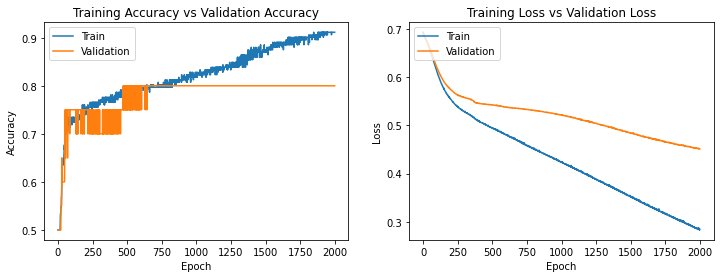

In [28]:
plot_acc_loss(history)

    Best model is 3

In [29]:
def prediction (y):
    if y == 1 :
        print('Quarto sujo')
    else :
        print('Quarto limpo')

In [30]:
def image_treament(path):
    
    image = Image.open(path)
    image = np.asarray(image) /255 
    image = image.reshape(1,50,50,2)
    
    return image

# Using model to image classification

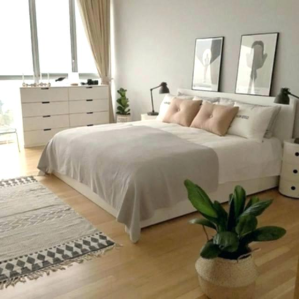

In [34]:
image_process = image_treament(process_test+'1.png')

image_visualization = Image.open(test_data+'1.png')
image_visualization

In [35]:
predict = model_3.predict_classes(image_process)
prediction(predict)

Quarto limpo


/home/luiz/.virtualenvs/messy_clean/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


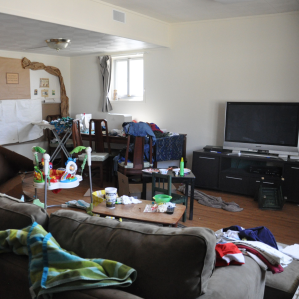

In [36]:
image_process = image_treament(process_test+'5.png')

image_visualization = Image.open(test_data+'5.png')
image_visualization

In [40]:
predict = model_3.predict_classes(image_process)
prediction(predict)

Quarto sujo


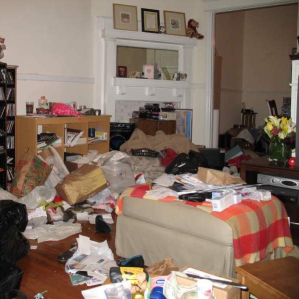

In [43]:
image_process = image_treament(process_test+'2.png')

image_visualization = Image.open(test_data+'2.png')
image_visualization

In [45]:
predict = model_3.predict_classes(image_process)
prediction(predict)

Quarto sujo


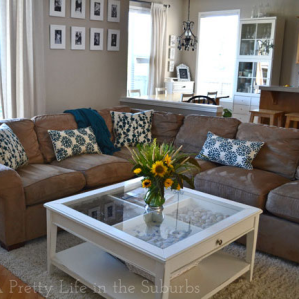

In [44]:
image_process = image_treament(process_test+'0.png')

image_visualization = Image.open(test_data+'0.png')
image_visualization

In [46]:
predict = model_3.predict_classes(image_process)
prediction(predict)

Quarto sujo


In [47]:
predict_mess = []
predict_clean = []

for category in category_names:
    
    path_processed = process_val+category
    
    for image in os.listdir(path_processed):
        
        image_process = image_treament(path_processed+image)
        predict = model_3.predict_classes(image_process)
        
        if category == 'messy/' :
            predict_mess.append(predict)
        else:
            predict_clean.append(predict)
            
            
true_ans = [predict_mess.count(1), predict_clean.count(0)]
false_ans = [predict_mess.count(0), predict_clean.count(1)]            

# Plot accuracy CNN

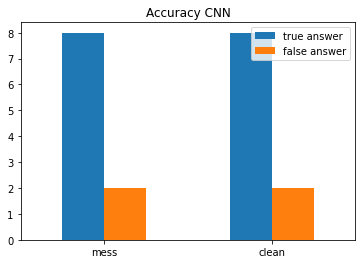

In [48]:
index = ['mess', 'clean' ]

df = pd.DataFrame({'true answer': true_ans, 'false answer': false_ans}, index=index)
ax = df.plot.bar(rot=0, title='Accuracy CNN' )

# Save model

In [49]:
model_3.save('../models/model_cnn_simple')

INFO:tensorflow:Assets written to: ../models/model_cnn_simple/assets
